# Load libraries and read the data

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("data/data.csv")

In [3]:
data.drop(columns=['id', 'Unnamed: 32'], inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [4]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [5]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [8]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9790
SVM Accuracy: 0.9860
Random Forest Accuracy: 0.9790
XGBoost Accuracy: 0.9860


C:\Users\SHARON\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [14:05:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


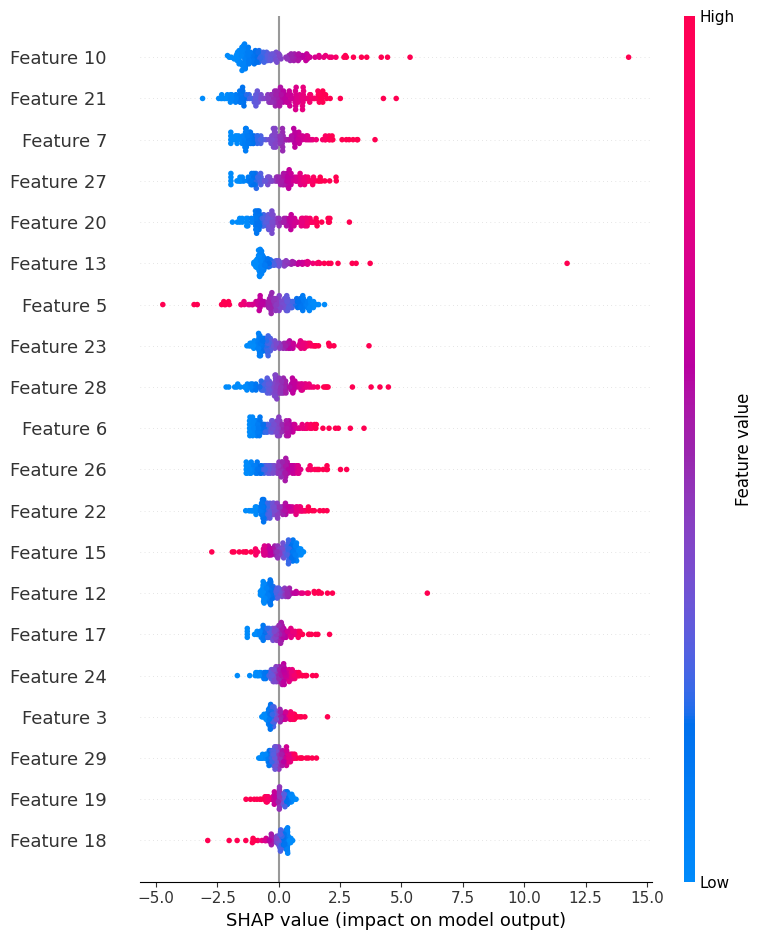

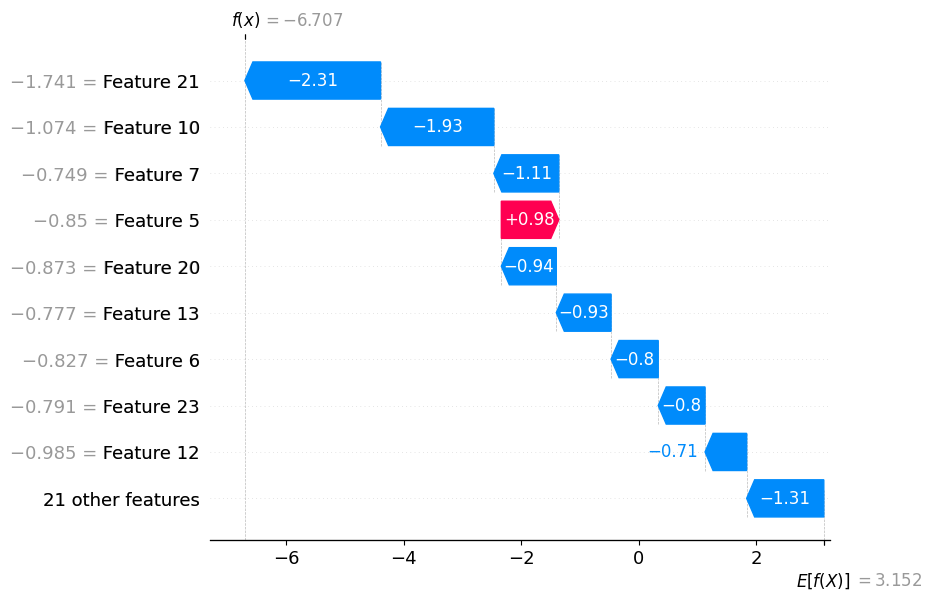

In [9]:
explainer = shap.Explainer(models["Logistic Regression"], X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)
shap.waterfall_plot(shap_values[0])

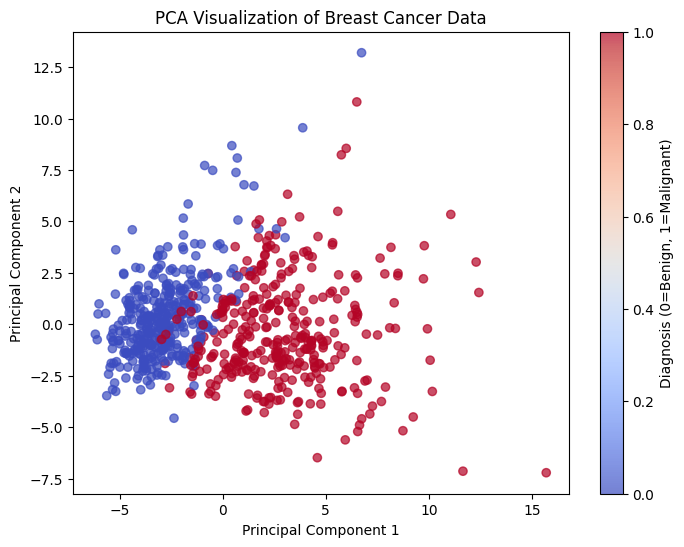

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Breast Cancer Data")
plt.colorbar(label="Diagnosis (0=Benign, 1=Malignant)")
plt.show()

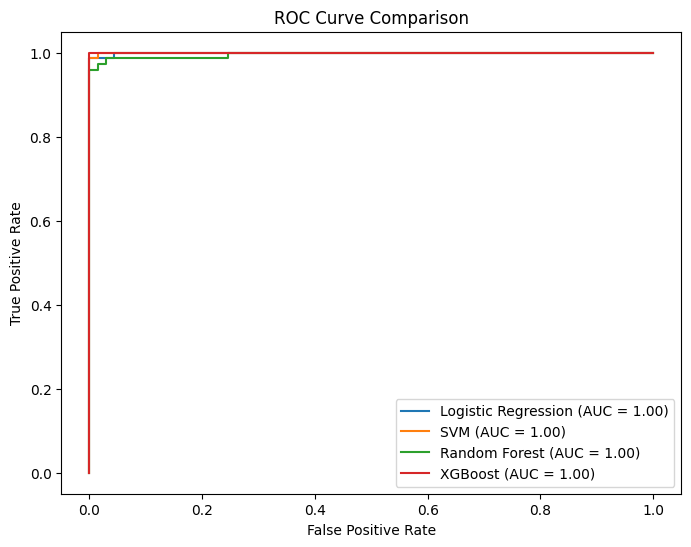

In [11]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()